### Linear regression with one predictor

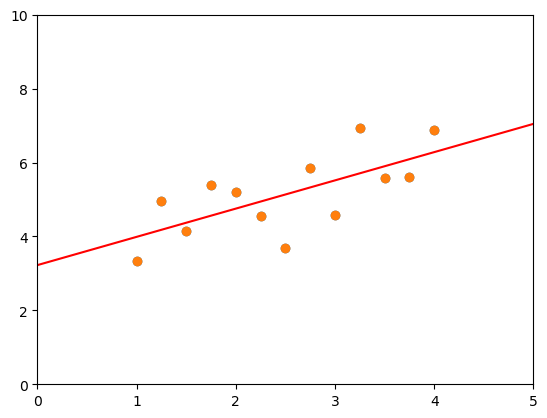

In [449]:
import numpy as np
import matplotlib.pyplot as plt

x = [1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00]
y = [3.34,4.97,4.15,5.40,5.21,4.56,3.69,5.86,4.58,6.94,5.57,5.62,6.87]
x = np.array(x)
y = np.array(y)

bias=3.2249
weights = [0.7642]

plt.scatter(x, y)
plt.ylim(0,10)
plt.xlim(0,5)

line_x = [0, 5]
line_y = [bias, bias+(5*weights[0])]

plt.scatter(x, y)
plt.plot(line_x, line_y, label='Line', color='red')  # Adding a line

plt.show()

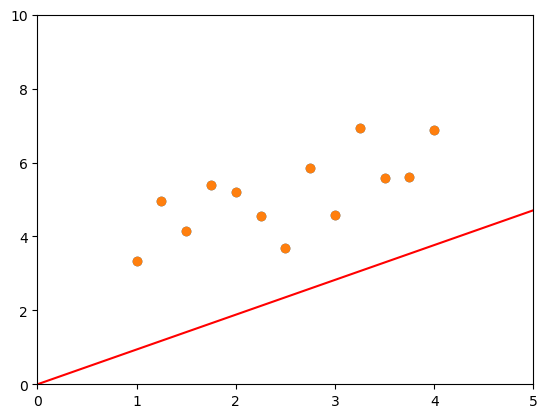

In [450]:


weights = np.random.rand(num_features)
bias=0

plt.scatter(x, y)
plt.ylim(0,10)
plt.xlim(0,5)
line_x = [0, 5]
line_y = [bias, bias+(5*weights[0])]

plt.scatter(x, y)
plt.plot(line_x, line_y, label='Line', color='red')  # Adding a line

plt.show()


In [451]:
n_iters = 100
num_features = 1
num_samples = len(y)
lr=0.2

for i in range(n_iters):
    y_est = x*weights[0]+bias
    
    errors = y_est - y
    error = np.sum(errors)
    
    dw = (1 / num_samples) * sum(x*errors)
    db = (1 / num_samples) * sum(errors)
    weights = weights - lr * dw
    bias = bias - lr * db

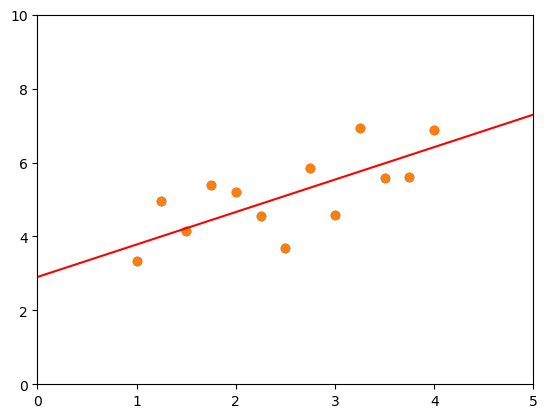

In [452]:
plt.scatter(x, y)
plt.ylim(0,10)
plt.xlim(0,5)
line_x = [0, 5]
line_y = [bias, bias+(5*weights[0])]

plt.scatter(x, y)
plt.plot(line_x, line_y, label='Line', color='red')  # Adding a line

plt.show()

### Logistic Regression

In [453]:
y = np.array([1 if item > np.median(y) else 0 for item in y])

In [454]:
weights = np.random.rand(num_features)
bias=0

In [455]:
n_iters = 100
num_features = 1
num_samples = len(y)
lr=0.8
for i in range(n_iters):
    z = x*weights+bias
    q = 1 / (1 + pow(math.e,-z))
    loss = sum(-(y*np.log2(q)+(1-y)*np.log2(1-q)))
    dw = sum(x*(q-y))/num_samples
    db = sum((q-y))/num_samples
    weights = weights - lr*dw
    bias = bias - lr*db
    print(loss)

12.783584679696446
12.580620354086278
12.411006886966408
12.255074939551687
12.108039922384934
11.967924301785883
11.833964065226944
11.705733501222257
11.582926025400107
11.465278947271637
11.352549303878924
11.244507408395831
11.140934209824664
11.041620658802897
10.946367216421667
10.854983585406428
10.76728839838825
10.68310892375201
10.602280750441956
10.524647470250061
10.450060353969809
10.37837802756647
10.309466149824233
10.243197094262293
10.17944963694852
10.118108651769665
10.059064814271242
10.00221431494912
9.947458582617868
9.894704018285791
9.84386173979407
9.794847337336806
9.747580639861578
9.701985492254813
9.657989543139449
9.615524043051451
9.574523652714433
9.534926261095805
9.496672812901828
9.459707145151013
9.42397583245413
9.389428040623576
9.356015388233775
9.323691815757103
9.292413461905445
9.262138546815494
9.23282726172577
9.204441664804422
9.17694558279912
9.150304518193021
9.124485561564189
9.09945730885912
9.0751897833046
9.051654361695425
9.0288237048

Logistic regression with 2 predictors

In [457]:
## Create simulated data
w1_center = (3, 3)
w2_center = (3, -2)
batch_size=50

x = np.zeros((batch_size, 2))
y = np.zeros(batch_size)
for i in range(batch_size):
    if np.random.random() > 0.5:
        x[i] = np.random.normal(loc=w1_center)
    else:
        x[i] = np.random.normal(loc=w2_center)
        y[i] = 1

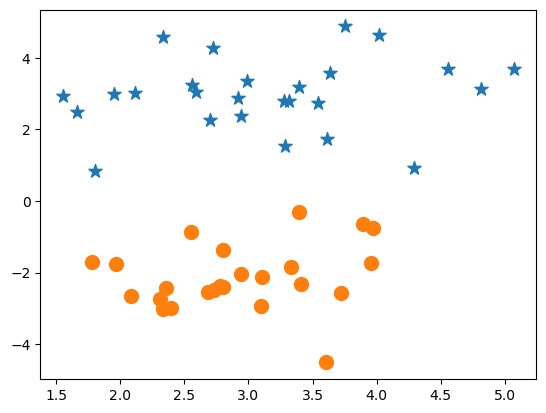

In [458]:
plt.scatter(x[y==0,0], x[y==0,1], marker='*', s=100)
plt.scatter(x[y==1,0], x[y==1,1], marker='o', s=100)


In [459]:
num_features=2
weights = np.random.rand(num_features)
bias=0

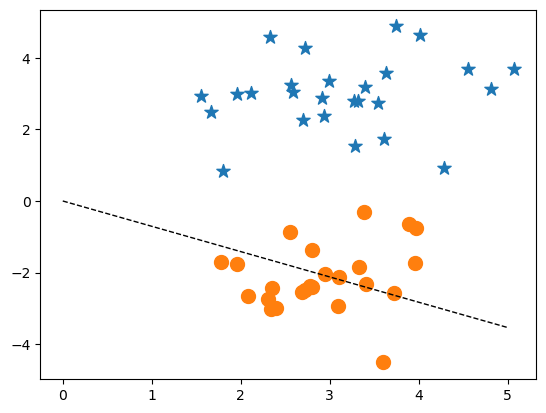

In [460]:
plt.scatter(x[y==0,0], x[y==0,1], marker='*', s=100)
plt.scatter(x[y==1,0], x[y==1,1], marker='o', s=100)
c = -bias/weights[1]
m = -weights[0]/weights[1]
xmin, xmax = 0, 5
ymin, ymax = -5, 5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')

In [ ]:
import time

n_iters = 100
num_features = 2
num_samples = len(y)
lr=0.2

plt.scatter(x[y==0,0], x[y==0,1], marker='*', s=100)
plt.scatter(x[y==1,0], x[y==1,1], marker='o', s=100)

for i in range(n_iters):
    z=x[:,0]*weights[0]+x[:,1]*weights[1]+bias
    q = 1 / (1 + pow(math.e,-z))
    loss = sum(-(y*np.log2(q)+(1-y)*np.log2(1-q)))
    dw1 = sum(x[:,0]*(q-y))/num_samples
    dw2 = sum(x[:,1]*(q-y))/num_samples
    db = sum((q-y))/num_samples
    weights[0] = weights[0] - lr*dw1
    weights[1] = weights[1] - lr*dw2
    bias = bias - lr*db
    #print(loss)
   
    c = -bias/weights[1]
    m = -weights[0]/weights[1]
    xmin, xmax = 0, 5
    ymin, ymax = -5, 5
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.pause(1.0)
plt.show()
    # time.sleep(0.5)

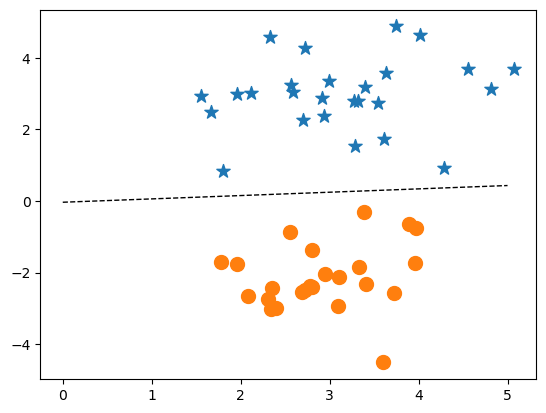

In [465]:
plt.scatter(x[y==0,0], x[y==0,1], marker='*', s=100)
plt.scatter(x[y==1,0], x[y==1,1], marker='o', s=100)
c = -bias/weights[1]
m = -weights[0]/weights[1]
xmin, xmax = 0, 5
ymin, ymax = -5, 5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')